<a href="https://colab.research.google.com/github/rghimre3/INFO5505_Machine_Learning_for_Data_Scientist/blob/main/INFO5505_Linear_Regression_(Assignment_1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

INFO5505_Machine_Learning_for_Data_Scientist 

Linear Regression (Assignment 1) 

@Ramesh Ghimire


In [2]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

Tasks: 1. Create at least two simple linear regression models, each of them has one different independent variable (you may transform the raw independent variable into different formats, such as to conduct a logarithmic transformation or combine two variables into a new variable such as Size = width * height). You may consider one variable as Size, and another one as Width. Create a scatter plot for showing the relationship between the independent variable and the dependent variable for each model, and also showing the linear regression line in the same plot. Calculate the error of the prediction with test data. 

In [4]:
#reading the data from gitlab
df=pd.read_csv("https://raw.githubusercontent.com/rghimre3/INFO5505_Machine_Learning_for_Data_Scientist/main/monet.csv")

In [5]:
#cheking fist 5 observation and checking shape, data types and info
print(df.head(20)) 
print("   ")
print(df.shape) 
print("   ")
print(df.describe())
print("   ")
print(df.info)

       PRICE  HEIGHT  WIDTH  SIGNED  PICTURE  HOUSE 
0   3.993780    21.3   25.6       1        1       1
1   8.800000    31.9   25.6       1        2       2
2   0.131694     6.9   15.9       0        3       3
3   2.037500    25.7   32.0       1        4       2
4   1.487500    25.7   32.0       1        4       2
5   1.870000    25.6   31.9       1        4       1
6   5.282500    25.5   35.6       1        5       1
7   5.065750    26.0   34.3       1        5       2
8   1.375000    25.6   36.2       1        5       2
9   2.530000    25.6   36.4       1        6       2
10  3.742500    25.6   36.4       1        6       2
11  0.364343    25.6   36.2       1        7       2
12  2.723870    31.9   39.4       1        8       2
13  3.520000    23.6   31.9       1        9       1
14  0.497500    19.5   25.0       1       10       2
15  9.350000    32.7   26.8       1       11       1
16  1.219500    25.5   36.0       1       12       2
17  0.407000    25.6   39.4       1       12  

In [6]:
print(df.dtypes)
# data no need data typecasting 

PRICE      float64
HEIGHT     float64
WIDTH      float64
SIGNED       int64
PICTURE      int64
HOUSE        int64
dtype: object


In [7]:
print(df.isnull().sum())

# there seems no null in the data 

PRICE      0
HEIGHT     0
WIDTH      0
SIGNED     0
PICTURE    0
HOUSE      0
dtype: int64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd589e93760>,
      dtype=object)

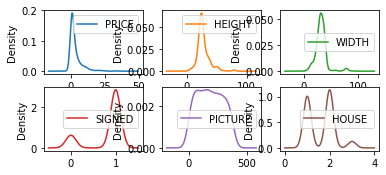

In [8]:
df.plot(kind='density', subplots=True, layout=(3,3), sharex=False)



In [9]:
df['SHAPE']=df['HEIGHT']*df['WIDTH']

In [ ]:
df.head()

,PRICE,HEIGHT,WIDTH,SIGNED,PICTURE,HOUSE,AREA
0,3.993780,21.3,25.6,1,1,1,545.28
1,8.800000,31.9,25.6,1,2,2,816.64
2,0.131694,6.9,15.9,0,3,3,109.71
3,2.037500,25.7,32.0,1,4,2,822.40
4,1.487500,25.7,32.0,1,4,2,822.40


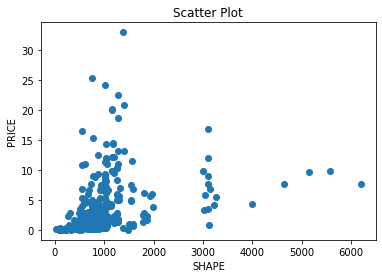

In [11]:
plt.scatter(df['SHAPE'], df['PRICE'])
# add labels and title
plt.xlabel('SHAPE')
plt.ylabel('PRICE')
plt.title('Scatter Plot')

# display the plot
plt.show()

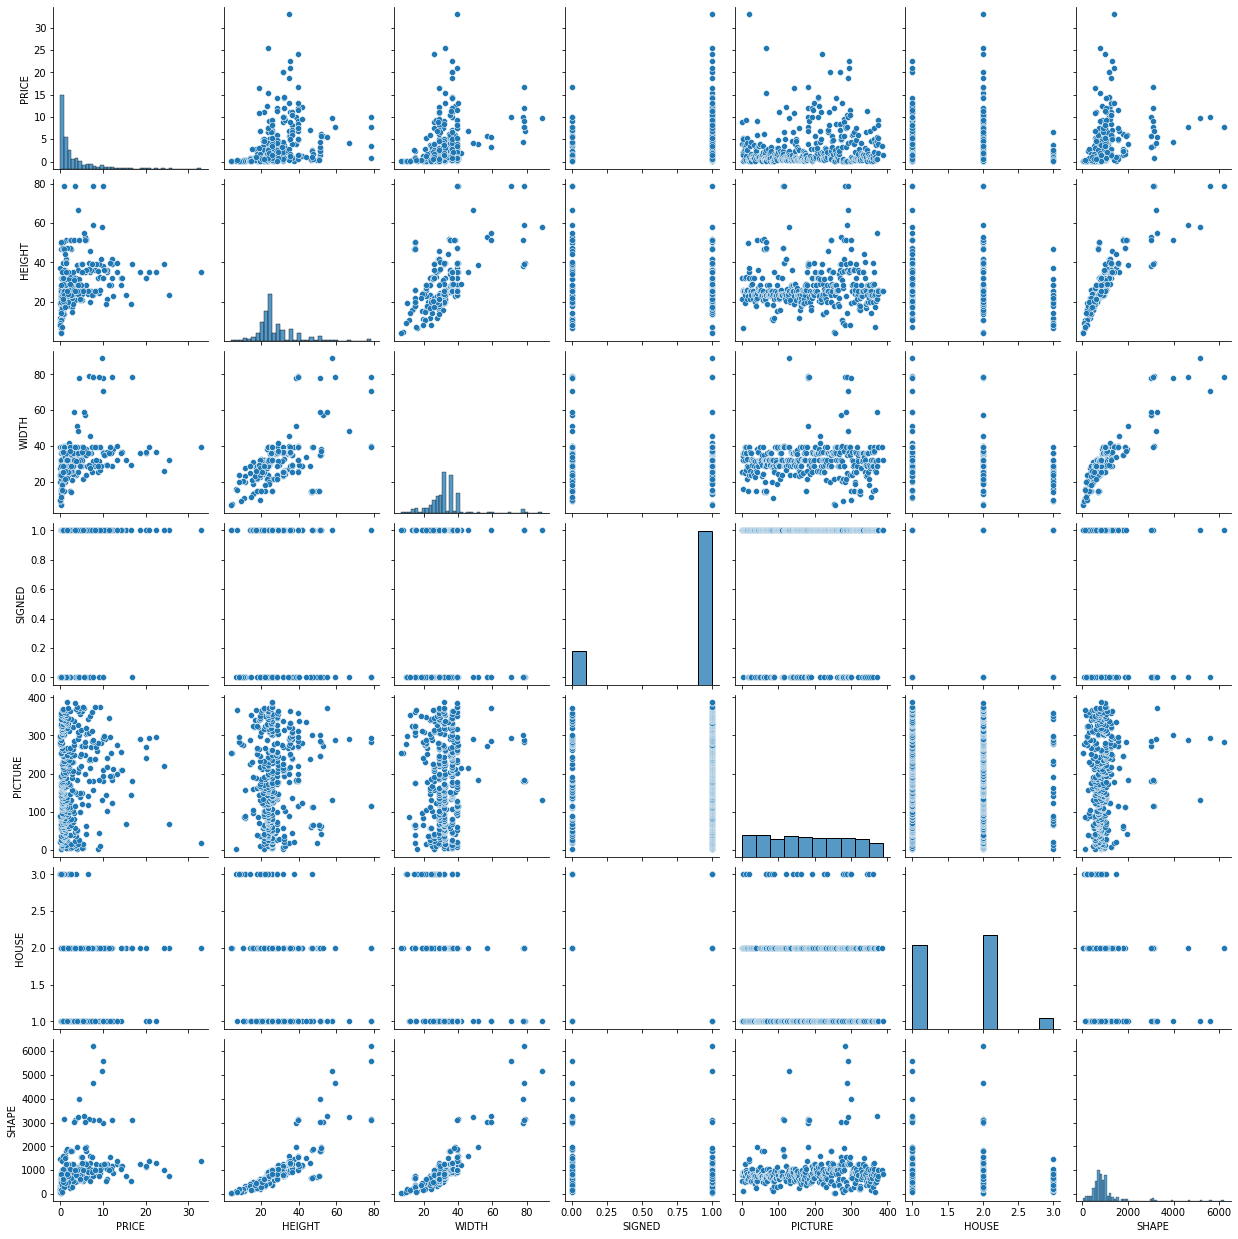

In [12]:
sns.pairplot(df)


In [14]:
Area = np.array(df['SHAPE'])
Price = np.array(df['PRICE'])
Width= np.array(df['WIDTH'])

This is the molde 1 WITH AREA AS INDEPENDEND VARIBLE 

In [15]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(Area.reshape(-1,1), Price, test_size=0.2, random_state=42)

# create a linear regression model
model = LinearRegression()

# fit the model to the training data
model.fit(X_train, y_train)

# make predictions on the testing data
y_pred = model.predict(X_test)

# print the model's coefficients
print('Coefficients: ', model.coef_)

# print the model's intercept
print('Intercept: ', model.intercept_)

Coefficients:  [0.00207643]
Intercept:  1.1538408583422475


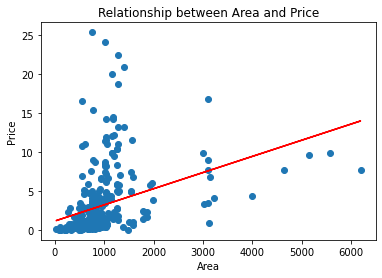

In [16]:
import matplotlib.pyplot as plt

# create a scatter plot of the data
plt.scatter(X_train, y_train)

# add the linear regression line to the plot
plt.plot(X_train, model.predict(X_train), color='red')

# add axis labels and a title to the plot
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Relationship between Area and Price')

# display the plot
plt.show()

In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# calculate performance metrics on the testing data
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# print the performance metrics
print('Mean Absolute Error: {:.2f}'.format(mae))
print('Mean Squared Error: {:.2f}'.format(mse))
print('R-squared Score: {:.2f}'.format(r2))

Mean Absolute Error: 2.43
Mean Squared Error: 18.65
R-squared Score: 0.11


This is the molel 2 with width as independent variable. 


In [19]:
# split the data into training and testing sets
X1_train, X1_test, y1_train, y1_test = train_test_split(Width.reshape(-1,1), Price, test_size=0.2, random_state=42)

# create a linear regression model
model = LinearRegression()

# fit the model to the training data
model.fit(X1_train, y1_train)

# make predictions on the testing data
y1_pred = model.predict(X1_test)

# print the model's coefficients
print('Coefficients: ', model.coef_)

# print the model's intercept
print('Intercept: ', model.intercept_)

Coefficients:  [0.13627626]
Intercept:  -1.2354033423356676


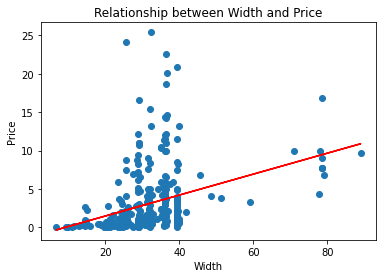

In [20]:
import matplotlib.pyplot as plt

# create a scatter plot of the data
plt.scatter(X1_train, y1_train)

# add the linear regression line to the plot
plt.plot(X1_train, model.predict(X1_train), color='red')

# add axis labels and a title to the plot
plt.xlabel('Width')
plt.ylabel('Price')
plt.title('Relationship between Width and Price')

# display the plot
plt.show()

In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# calculate performance metrics on the testing data
mae = mean_absolute_error(y1_test, y1_pred)
mse = mean_squared_error(y1_test, y1_pred)
r2 = r2_score(y1_test, y1_pred)

# print the performance metrics
print('Mean Absolute Error: {:.2f}'.format(mae))
print('Mean Squared Error: {:.2f}'.format(mse))
print('R-squared Score: {:.2f}'.format(r2))

Mean Absolute Error: 2.45
Mean Squared Error: 18.52
R-squared Score: 0.12


2. Create a multivariate linear regression model. You may need to consider the normalization of the raw data. Calculate the error of the prediction with test data. 

In [22]:
new_columns = {column: column.strip() for column in df.columns}
df1 = df.rename(columns=new_columns)

In [24]:
X2 = df1[['SHAPE', 'HEIGHT', 'WIDTH', 'SIGNED', 'PICTURE', 'HOUSE']].values
y2 = df1['PRICE'].values

In [25]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=0)

In [26]:
mean = X2_train.mean(axis=0)
std = X2_train.std(axis=0)
X2_train = (X2_train - mean) / std
X2_test = (X2_test - mean) / std

In [27]:
model = LinearRegression()
model.fit(X2_train, y2_train)

LinearRegression()

In [32]:
y2_pred = model.predict(X2_test)
mse = mean_squared_error(y2_test, y2_pred)
print("Mean squared error:", mse)

Mean squared error: 15.354085812007362


In [33]:

# fit the model to the training data
model.fit(X2_train, y2_train)

# make predictions on the testing data
y2_pred = model.predict(X2_test)

# print the model's coefficients
print('Coefficients: ', model.coef_)

# print the model's intercept
print('Intercept: ', model.intercept_)

Coefficients:  [-0.71142658  1.11915081  1.78959303  0.75425404  0.39997816  0.3172932 ]
Intercept:  2.999808677325581


In [34]:
mae = mean_absolute_error(y2_test, y2_pred)
mse = mean_squared_error(y2_test, y2_pred)
r2 = r2_score(y2_test, y2_pred)

# print the performance metrics
print('Mean Absolute Error: {:.2f}'.format(mae))
print('Mean Squared Error: {:.2f}'.format(mse))
print('R-squared Score: {:.2f}'.format(r2))

Mean Absolute Error: 2.55
Mean Squared Error: 15.35
R-squared Score: 0.15
